In [1]:
%matplotlib inline
import os

import cv2
import numpy as np
import matplotlib.pyplot as plt


import utils
import get
import post

In [2]:
def set_plt_size(*size):
    plt.rcParams['figure.figsize'] = size

def plot_markers(markers):
    cols = len(markers)
    rows = cols // 10 + 1
    if cols % 10 == 0:
        rows -= 1
    cols = min(10, cols)
    set_plt_size(4 * cols, 4 * rows)
    fix, axs = plt.subplots(rows, cols)
    for i, marker in enumerate(markers):
        if rows > 1:
            axs[i // 10, i % 10].imshow(marker)
            axs[i // 10, i % 10].axis('off')
        else:
            axs[i].imshow(marker)
            axs[i].axis('off')

In [3]:
data = np.load('file.npz')
coords = data['coords']
# markers = data['markers']
markers = utils.prepare(data['markers'].astype(np.uint8), offset=8)

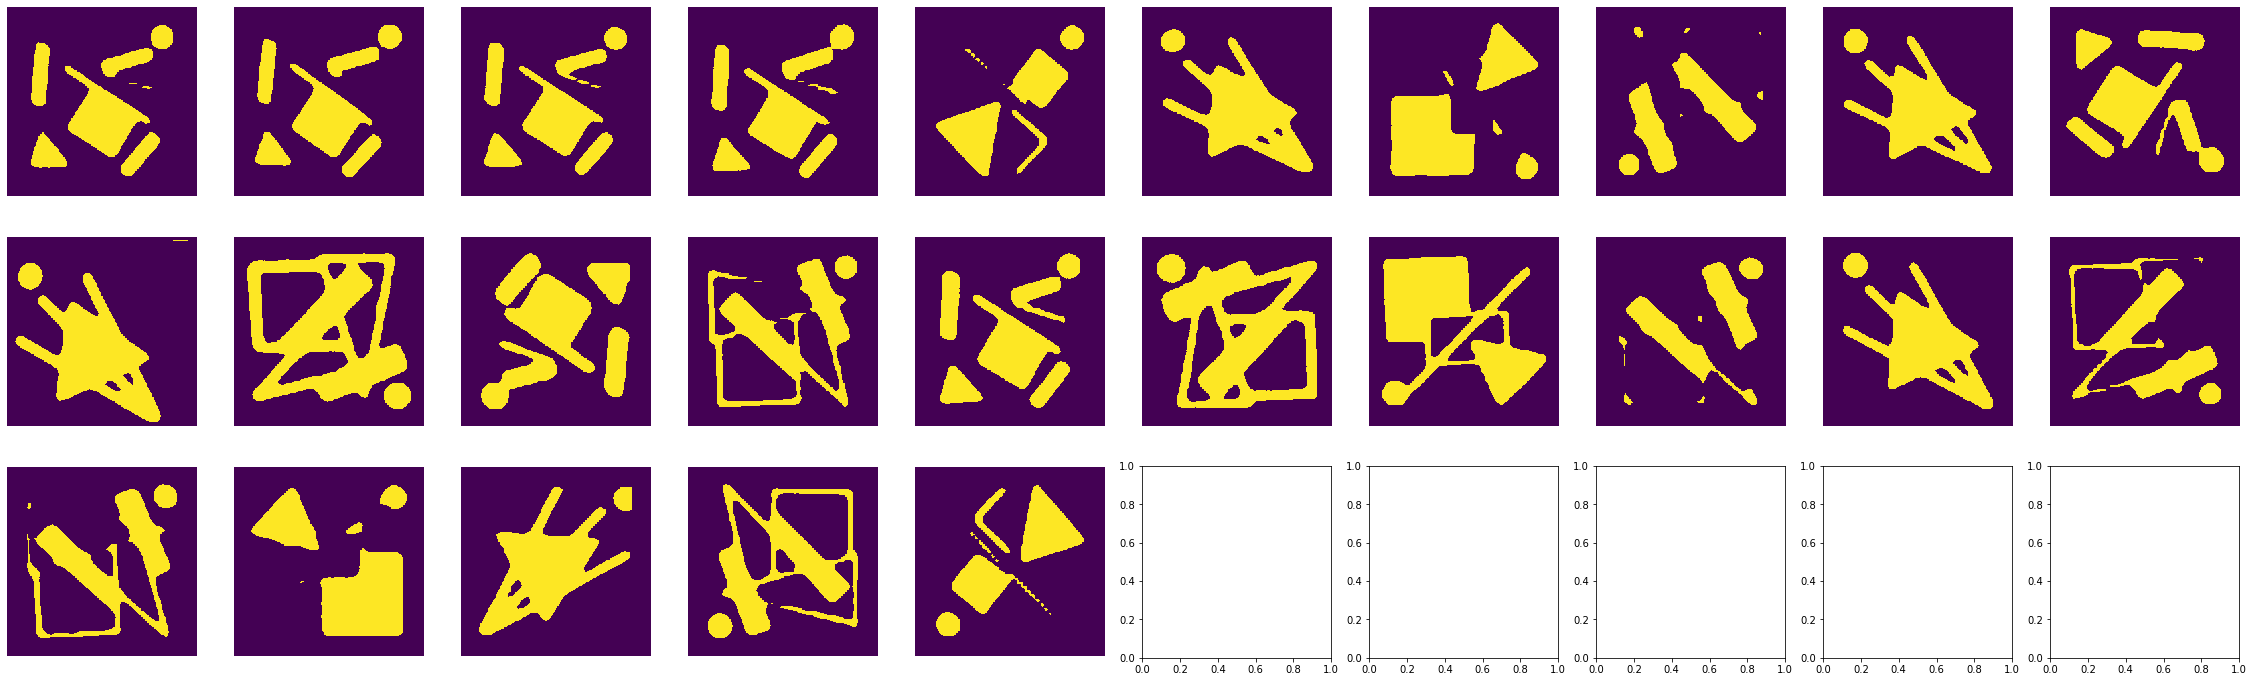

In [4]:
plot_markers(markers)

In [5]:
templates = {}
for filename in os.listdir('./rotated_templates/'):
    num, *_ = filename.split('.')
    img = cv2.imread('./rotated_templates/' + filename, 0)
    templates[num] = img

In [6]:
def recognize(marker):
    results = {}
    for key, template in templates.items():
        results[key] = cv2.matchTemplate(marker, template, cv2.TM_CCOEFF_NORMED).sum()
    key = max(results, key=lambda key: results[key])
    return int(key[0]), int(key[2:]), None

In [7]:
answer = []
for (x, y), marker in zip(coords, markers):
    _id, rot, _ = recognize(marker)
    answer.append([_id, x, y, rot])
#     i = len(answer) - 1
#     cv2.imwrite(f'{_id}-{rot}/{i}.jpg', data['markers'][i])

5:90        5:90        5:90        5:90        7:90        1:0         6:0         3:270       1:0         5:180


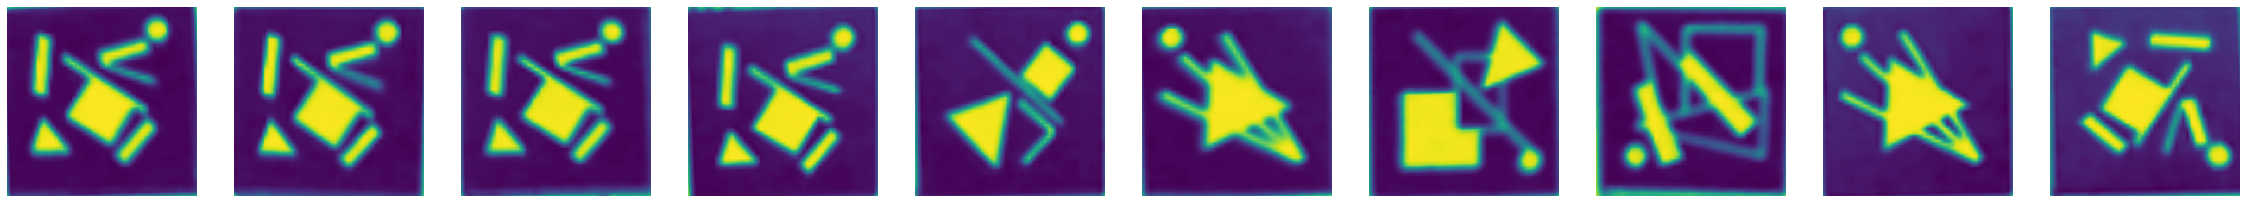

In [8]:
I = 0
J = I + 10
plot_markers(data['markers'][I:J])
print(*[f'{i}:{rot:<3}' for i, x, y, rot in answer[I:J]], sep=' ' * 7)

2:0         2:270       5:270       3:90        5:90        3:0         6:90        3:90        1:0         3:180


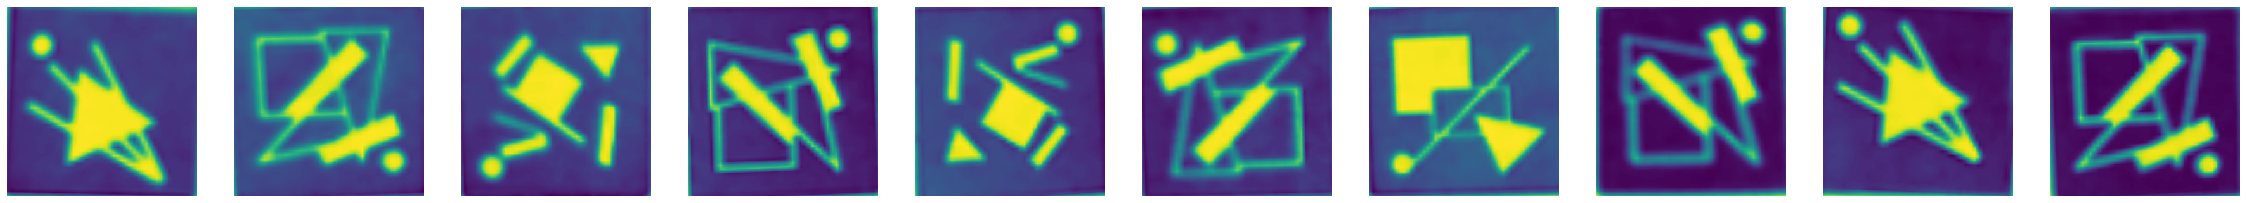

In [9]:
I += 10
J = I + 10
plot_markers(data['markers'][I:J])
print(*[f'{i}:{rot:<3}' for i, x, y, rot in answer[I:J]], sep=' ' * 7)

3:90        6:270       1:90        3:270       7:270


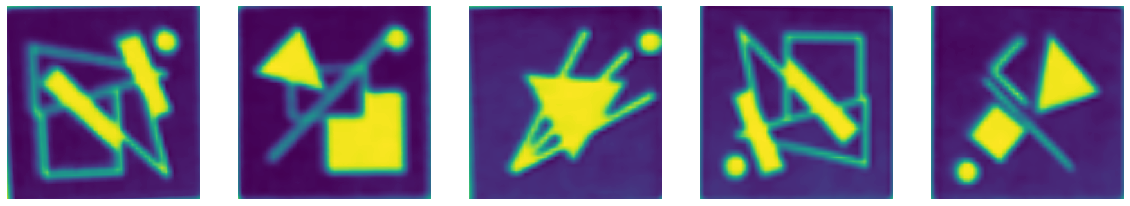

In [10]:
I += 10
J = I + 10
plot_markers(data['markers'][I:J])
print(*[f'{i}:{rot:<3}' for i, x, y, rot in answer[I:J]], sep=' ' * 7)

In [11]:
I += 10
J = I + 10
plot_markers(data['markers'][I:J])
print(*[f'{i}:{rot:<3}' for i, x, y, rot in answer[I:J]], sep=' ' * 7)

<Figure size 0x0 with 0 Axes>

In [12]:
I += 10
J = I + 10
plot_markers(data['markers'][I:J])
print(*[f'{i}:{rot:<3}' for i, x, y, rot in answer[I:J]], sep=' ' * 7)

<Figure size 0x0 with 0 Axes>

In [13]:
I += 10
J = I + 10
plot_markers(data['markers'][I:J])
print(*[f'{i}:{rot:<3}' for i, x, y, rot in answer[I:J]], sep=' ' * 7)

<Figure size 0x0 with 0 Axes>